# APEX-MODFLOW Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import matplotlib.patches as patches
from hydroeval import evaluator, nse, rmse, pbias
from pyemu.pst.pst_utils import SFMT,IFMT,FFMT

flopy is installed in C:\Users\seonggyu.park\Miniconda3\envs\sm_pest\lib\site-packages\flopy


In [2]:
from apexmf_pst_pkgs import apexmf_pst_viz

# Set Path

In [3]:
wd = "D:/Projects/Watersheds/Animas/Analysis/APEX-MODFLOWs/calibrations/qam_test/APEX-MODFLOW"
os.chdir(wd)


In [8]:
mf_dic = {5895:'gw_124', 6273:'gw_098'}

df = pd.DataFrame()
for sim, obd in mf_dic.items():
    mfdf = apexmf_pst_viz.wt_df('1/1/1980', sim, obd)
    new_cols ={x:y for x, y in zip(mfdf.columns, ['sim', 'obd'])}
    df = df.append(mfdf.rename(columns=new_cols))
    df = df.dropna()
    # apexmf_pst_viz.wt_plot(mfdf['1/1/1992':'12/31/1999'])

In [38]:
a = apexmf_pst_viz.wt_df('1/1/1980', 5895, 'gw_124')
a = a.dropna()
# a = a.rename({'5895':'sim', 'gw_124':'obd'}, axis=1)
b = apexmf_pst_viz.wt_df('1/1/1980', 6273, 'gw_098')
b = b.dropna()
# b = b.rename({'6273':'sim', 'gw_098':'obd'}, axis=1)
# df = pd.concat([a, b], ignore_index=True, axis=0)


In [39]:

warm_grids = [3237, 3770, 4373, 5895, 6273]
warm_obds = ['gw_162', 'gw_160', 'gw_157', 'gw_124', 'gw_098']
cals_grids = [5895, 6273]
cals_obds = ['gw_124', 'gw_098']

warm_df = apexmf_pst_viz.wt_tot_df('1/1/1980', '1/1/1980', '12/31/1990', warm_grids, warm_obds)
cali_df = apexmf_pst_viz.wt_tot_df('1/1/1980', '1/1/1980', '12/31/1999', warm_grids, warm_obds)
only_cali = apexmf_pst_viz.wt_tot_df('1/1/1980', '1/1/1980', '12/31/1999', cals_grids, cals_obds)
vali_df = apexmf_pst_viz.wt_tot_df('1/1/1980', '1/1/2000', '12/31/2005', warm_grids, warm_obds)

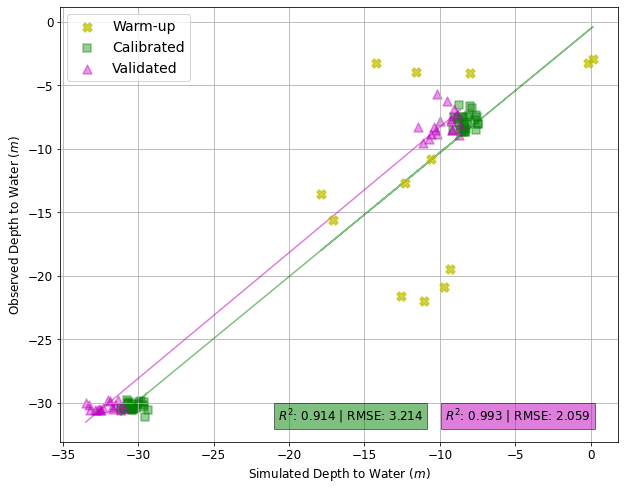

In [57]:
fig, ax = plt.subplots(figsize=(10,8))
ax.grid(True)
ax.scatter(
        warm_df.sim, warm_df.obd,
        facecolors="y", edgecolors='y',
        s=80,
        lw=1.5,
        alpha=0.7,
        zorder=10,
        marker='X',
        label='Warm-up'
        )
ax.scatter(
        only_cali.sim, only_cali.obd,
        facecolors="g", edgecolors='g',
        s=80,
        lw=1.5,
        alpha=0.4,
        # zorder=2,
        marker='s',
        label='Calibrated'
        )
ax.scatter(
        vali_df.sim, vali_df.obd,
        facecolors="m", edgecolors='m',
        s=80,
        marker='^',
        lw=1.5,
        alpha=0.4,
        label='Validated'
        # zorder=2,
)

x_cal = cali_df.sim.tolist()
y_cal = cali_df.obd.tolist()

x_val = vali_df.sim.tolist()
y_val = vali_df.obd.tolist()

corrl_matrix_cal = np.corrcoef(x_cal, y_cal)
corrl_xy_cal = corrl_matrix_cal[0,1]
r_squared_cal = corrl_xy_cal**2
rmse_cal = evaluator(rmse, cali_df.sim.to_numpy(), cali_df.obd.to_numpy())
rmse_val = evaluator(rmse, vali_df.sim.to_numpy(), vali_df.obd.to_numpy())

m_cal, b_cal = np.polyfit(x_cal, y_cal, 1)
ax.plot(np.array(x_cal), (m_cal*np.array(x_cal)) + b_cal, 'g', alpha=0.5)
corrl_matrix_val = np.corrcoef(x_val, y_val)
corrl_xy_val = corrl_matrix_val[0,1]
r_squared_val = corrl_xy_val**2
m_val, b_val = np.polyfit(x_val, y_val, 1)
ax.plot(np.array(x_val), (m_val*np.array(x_val)) + b_val, 'm', alpha=0.5)


ax.set_xlabel('Simulated Depth to Water $(m)$', fontsize=12)
ax.set_ylabel('Observed Depth to Water $(m)$', fontsize=12)
ax.text(
        0.65, 0.05,
        '$R^2$: {:.3f} | RMSE: {:.3f}'.format(r_squared_cal, rmse_cal[0]),
        fontsize=12,
        horizontalalignment='right',
        bbox=dict(facecolor='g', alpha=0.5),
        transform=ax.transAxes
        )
ax.text(
        0.95, 0.05,
        '$R^2$: {:.3f} | RMSE: {:.3f}'.format(r_squared_val, rmse_val[0]),
        fontsize=12,
        horizontalalignment='right',
        bbox=dict(facecolor='m', alpha=0.5),
        transform=ax.transAxes
        )
ax.tick_params(axis='both', labelsize=12)
# ax.set_xlim(-35, 0)
# ax.set_ylim(-35, 0)
plt.legend(fontsize=14)
plt.show()

In [60]:
sim_org = vali_df.iloc[:, 0].to_numpy()
obd_org = vali_df.iloc[:, 1].to_numpy()

r_squared = (
    ((sum((obd_org - obd_org.mean())*(sim_org - sim_org.mean())))**2)/
    ((sum((obd_org - obd_org.mean())**2)* (sum((sim_org - sim_org.mean())**2))))
    )
print(r_squared)

0.9931764767807977
